In [1]:
import math
import numpy as np
import pandas as pd
import random
import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
lead_df = pd.read_csv("./data/Lead Intake.csv")
lead_df.head()

,Full Name,Email,Contact Number,Preferred Locations,Budget Range,Property Type,Must-Have Features,Timeline,Property Name1 SF,Property Score1 SF,Property Name2 SF,Property Score2 SF,Property Name3 SF,Property Score3 SF,Assigned Agent
0,Bikram Saha,bikram@gmail.com,6294651690,Bengaluru,6000000,Apartment,"Belcony, Parking",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agnik Ghosh,agnik@gmail.com,9510510690,Kolkata,5000000,Apartment,"Security, Garden",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Biman Pal,biman@gmail.com,6294678690,Chennai,12000000,Villa,"Garden, Parking",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ram Kumar,ram@gmail.com,9000510220,Coimbatore,8000000,Land,Garden,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Laxman Singh,laxman@gmail.com,6394651700,Bengaluru,9000000,Villa,"Belcony, Parking, Garden",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prop_df = pd.read_csv("./data/Property Listings.csv")
prop_df.head()

,Property Id,Property Name,Location,Price,Property Type,Features,Bedrooms,Area,Status
0,10,Modern Flats,Coimbatore,2000000.0,Apartment,"Belcony,Parking,Security",3.0,1400,Available
1,9,Family Villas,Bengaluru,11000000.0,Villa,"Belcony,Parking,Garden,Security",4.0,2400,Available
2,8,Premium Plots,Bengaluru,10000000.0,Plot,Security,NaN,2000,Available
3,7,Budget Apartments,Kolkata,1000000.0,Apartment,Belcony,2.0,1000,Available
4,6,Cozy Homes,Coimbatore,6000000.0,Villa,"Parking,Garden",3.0,1800,Available


In [5]:
def normalize_list(cell):
    if pd.isna(cell):
        return set()
    return set(item.strip().lower() for item in str(cell).split(','))

In [6]:
def compute_score(lead, prop):
    score = 0

    lead_locations = normalize_list(lead["Preferred Locations"])
    if str(prop["Location"]).strip().lower() in lead_locations:
        score += 50

    try:
        budget = float(lead["Budget Range"])
        price = float(prop["Price"])
        if budget * 0.9 <= price <= budget * 1.1:
            score += 25
    except:
        pass

    if str(lead["Property Type"]).strip().lower() == str(prop["Property Type"]).strip().lower():
        score += 15

    lead_features = normalize_list(lead["Must-Have Features"])
    prop_features = normalize_list(prop["Features"])
    if len(lead_features & prop_features) >= 2:
        score += 10

    return score

In [7]:
for index, lead in lead_df.iterrows():
    matches = []

    for _, prop in prop_df.iterrows():
        score = compute_score(lead, prop)
        if score > 0:
            matches.append((prop["Property Name"], score))

    matches = sorted(matches, key=lambda x: x[1], reverse=True)[:3]

    for i, (name, score) in enumerate(matches):
        lead_df.at[index, f"Property Name{i+1} SF"] = name
        lead_df.at[index, f"Property Score{i+1} SF"] = score

In [8]:
lead_df.to_csv("./data/Lead Intake - With Matches.csv", index=False)
print("✅ Matching complete. Results saved in 'Lead Intake - With Matches.csv'")

✅ Matching complete. Results saved in 'Lead Intake - With Matches.csv'


In [9]:
df = pd.read_csv("./data/Lead Intake - With Matches.csv")
df.head()

,Full Name,Email,Contact Number,Preferred Locations,Budget Range,Property Type,Must-Have Features,Timeline,Property Name1 SF,Property Score1 SF,Property Name2 SF,Property Score2 SF,Property Name3 SF,Property Score3 SF,Assigned Agent
0,Bikram Saha,bikram@gmail.com,6294651690,Bengaluru,6000000,Apartment,"Belcony, Parking",0,Luxury Penthouses,75.0,Family Villas,60.0,Premium Plots,50.0,NaN
1,Agnik Ghosh,agnik@gmail.com,9510510690,Kolkata,5000000,Apartment,"Security, Garden",30,Green Valley Plots,75.0,Budget Apartments,65.0,Modern Flats,15.0,NaN
2,Biman Pal,biman@gmail.com,6294678690,Chennai,12000000,Villa,"Garden, Parking",0,Family Villas,50.0,City View Flats,50.0,Villa Gardens,50.0,NaN
3,Ram Kumar,ram@gmail.com,9000510220,Coimbatore,8000000,Land,Garden,60,Modern Flats,50.0,Cozy Homes,50.0,City View Flats,25.0,NaN
4,Laxman Singh,laxman@gmail.com,6394651700,Bengaluru,9000000,Villa,"Belcony, Parking, Garden",0,Family Villas,75.0,Villa Gardens,75.0,Luxury Penthouses,60.0,NaN


In [10]:
df["Top Score"] = df["Property Score1 SF"].fillna(0)

In [11]:
def categorize(score):
    if score >= 90:
        return "Hot"
    elif score >= 70:
        return "Warm"
    else:
        return "Cold"

In [12]:
df["Top Score"] = df["Property Score1 SF"].fillna(0)
df["Lead Category"] = df["Top Score"].apply(categorize)

In [13]:
sns.set(style="whitegrid")

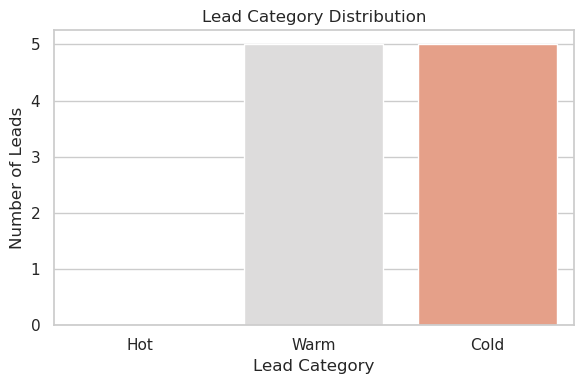

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Lead Category", palette="coolwarm", order=["Hot", "Warm", "Cold"])
plt.title("Lead Category Distribution")
plt.xlabel("Lead Category")
plt.ylabel("Number of Leads")
plt.tight_layout()
plt.savefig("lead_category_distribution.png")
plt.show()

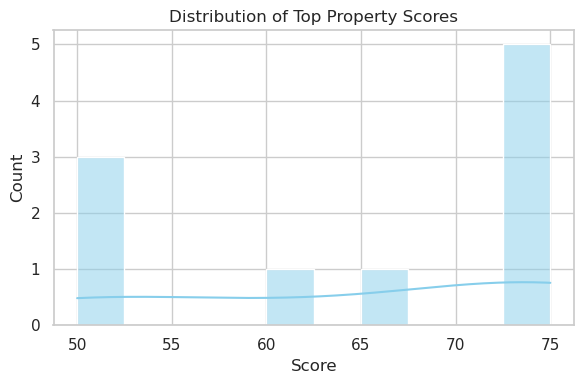

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Top Score"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Top Property Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("score_distribution.png")
plt.show()

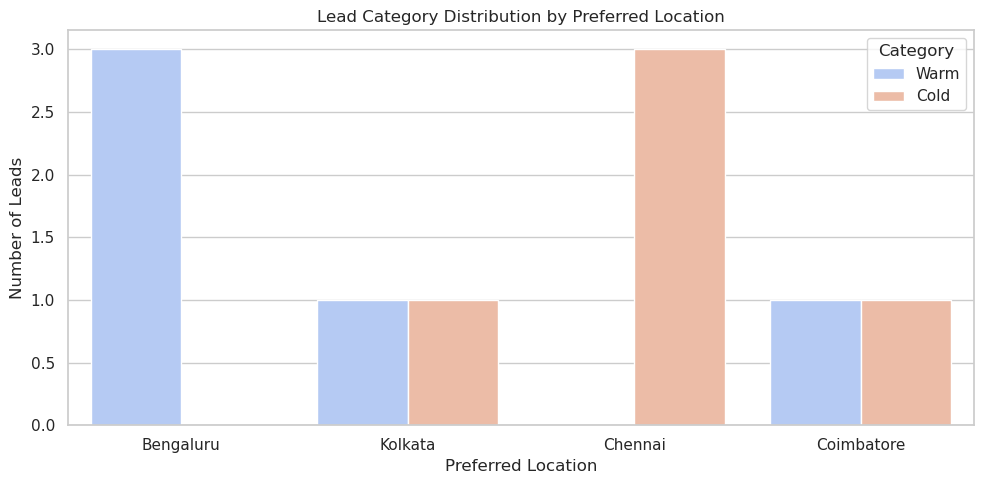

In [16]:
df_exploded = df.copy()
df_exploded["Preferred Locations"] = df_exploded["Preferred Locations"].astype(str)
df_exploded = df_exploded.assign(Preferred_Location=df_exploded["Preferred Locations"].str.split(",")).explode("Preferred_Location")
df_exploded["Preferred_Location"] = df_exploded["Preferred_Location"].str.strip()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_exploded, x="Preferred_Location", hue="Lead Category", palette="coolwarm")
plt.title("Lead Category Distribution by Preferred Location")
plt.xlabel("Preferred Location")
plt.ylabel("Number of Leads")
plt.legend(title="Category")
plt.tight_layout()
plt.savefig("location_vs_category.png")
plt.show()

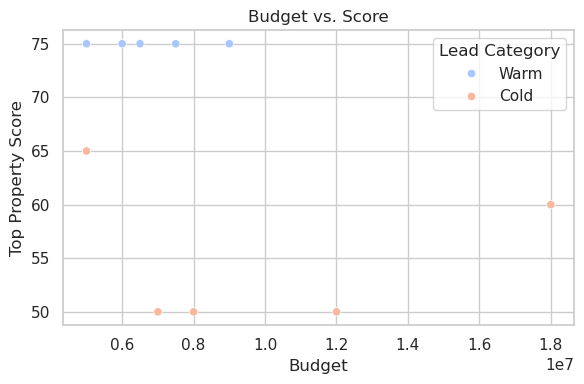

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Budget Range", y="Top Score", hue="Lead Category", palette="coolwarm")
plt.title("Budget vs. Score")
plt.xlabel("Budget")
plt.ylabel("Top Property Score")
plt.tight_layout()
plt.savefig("budget_vs_score.png")
plt.show()

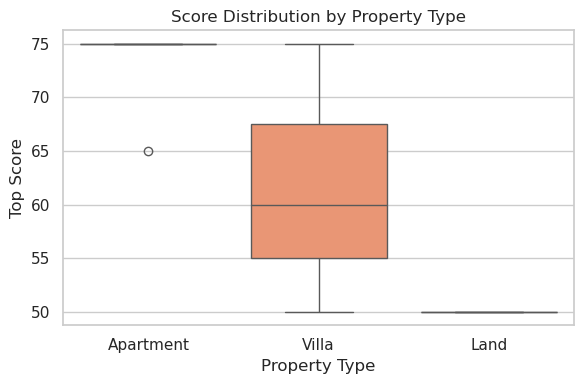

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Property Type", y="Top Score", palette="Set2")
plt.title("Score Distribution by Property Type")
plt.tight_layout()
plt.savefig("property_type_vs_score.png")
plt.show()

In [19]:
print("Lead Category Counts:")
print(df["Lead Category"].value_counts())

Lead Category Counts:
Lead Category
Warm    5
Cold    5
Name: count, dtype: int64


In [20]:
agent_df = pd.read_csv("./data/Agents.csv")
agent_df.head()

,Agent Name,Agent Contact,Agent Email,City,Assigned Property Id,Assigned Property Name,Manager Name
0,Agent1,9874563210,agent1@gmail.com,Kolkata,NaN,NaN,Manager1
1,Agent2,9874563211,agent2@gmail.com,Kolkata,NaN,NaN,Manager1
2,Agent3,9874563212,agent3@gmail.com,Chennai,NaN,NaN,Manager2
3,Agent4,9874563213,agent4@gmail.com,Chennai,NaN,NaN,Manager2
4,Agent5,9874563214,agent5@gmail.com,Bengaluru,NaN,NaN,Manager1


In [21]:
manager_df = pd.read_csv("./data/Managers.csv")
manager_df.head()

,Manager Name,Manager Contact,Manager Email
0,Manager1,9988774561,manager1@gmail.com
1,Manager2,9988774562,manager2@gmail.com


In [22]:
city_agent_map = defaultdict(list)
for _, row in agent_df.iterrows():
    city_agent_map[row["City"].strip()].append(row["Agent Name"])

In [23]:
round_robin_index = defaultdict(int)

In [24]:
def assign_agent(locations):
    location_list = [loc.strip() for loc in str(locations).split(",")]
    for location in location_list:
        agents = city_agent_map.get(location)
        if agents:
            idx = round_robin_index[location] % len(agents)
            round_robin_index[location] += 1
            return agents[idx]
    return "Unassigned"

In [25]:
df["Assigned Agent"] = df["Preferred Locations"].apply(assign_agent)

In [26]:
df.head()

,Full Name,Email,Contact Number,Preferred Locations,Budget Range,Property Type,Must-Have Features,Timeline,Property Name1 SF,Property Score1 SF,Property Name2 SF,Property Score2 SF,Property Name3 SF,Property Score3 SF,Assigned Agent,Top Score,Lead Category
0,Bikram Saha,bikram@gmail.com,6294651690,Bengaluru,6000000,Apartment,"Belcony, Parking",0,Luxury Penthouses,75.0,Family Villas,60.0,Premium Plots,50.0,Agent5,75.0,Warm
1,Agnik Ghosh,agnik@gmail.com,9510510690,Kolkata,5000000,Apartment,"Security, Garden",30,Green Valley Plots,75.0,Budget Apartments,65.0,Modern Flats,15.0,Agent1,75.0,Warm
2,Biman Pal,biman@gmail.com,6294678690,Chennai,12000000,Villa,"Garden, Parking",0,Family Villas,50.0,City View Flats,50.0,Villa Gardens,50.0,Agent3,50.0,Cold
3,Ram Kumar,ram@gmail.com,9000510220,Coimbatore,8000000,Land,Garden,60,Modern Flats,50.0,Cozy Homes,50.0,City View Flats,25.0,Agent7,50.0,Cold
4,Laxman Singh,laxman@gmail.com,6394651700,Bengaluru,9000000,Villa,"Belcony, Parking, Garden",0,Family Villas,75.0,Villa Gardens,75.0,Luxury Penthouses,60.0,Agent6,75.0,Warm


In [27]:
df = df.merge(agent_df[["Agent Name", "Agent Contact", "Agent Email", "Manager Name"]], 
                          left_on="Assigned Agent", right_on="Agent Name", how="left")

In [28]:
df.head()

,Full Name,Email,Contact Number,Preferred Locations,Budget Range,Property Type,Must-Have Features,Timeline,Property Name1 SF,Property Score1 SF,...,Property Score2 SF,Property Name3 SF,Property Score3 SF,Assigned Agent,Top Score,Lead Category,Agent Name,Agent Contact,Agent Email,Manager Name
0,Bikram Saha,bikram@gmail.com,6294651690,Bengaluru,6000000,Apartment,"Belcony, Parking",0,Luxury Penthouses,75.0,...,60.0,Premium Plots,50.0,Agent5,75.0,Warm,Agent5,9874563214,agent5@gmail.com,Manager1
1,Agnik Ghosh,agnik@gmail.com,9510510690,Kolkata,5000000,Apartment,"Security, Garden",30,Green Valley Plots,75.0,...,65.0,Modern Flats,15.0,Agent1,75.0,Warm,Agent1,9874563210,agent1@gmail.com,Manager1
2,Biman Pal,biman@gmail.com,6294678690,Chennai,12000000,Villa,"Garden, Parking",0,Family Villas,50.0,...,50.0,Villa Gardens,50.0,Agent3,50.0,Cold,Agent3,9874563212,agent3@gmail.com,Manager2
3,Ram Kumar,ram@gmail.com,9000510220,Coimbatore,8000000,Land,Garden,60,Modern Flats,50.0,...,50.0,City View Flats,25.0,Agent7,50.0,Cold,Agent7,9874563216,agent7@gmail.com,Manager2
4,Laxman Singh,laxman@gmail.com,6394651700,Bengaluru,9000000,Villa,"Belcony, Parking, Garden",0,Family Villas,75.0,...,75.0,Luxury Penthouses,60.0,Agent6,75.0,Warm,Agent6,9874563215,agent6@gmail.com,Manager1


In [29]:
df = df.merge(manager_df, on="Manager Name", how="left", suffixes=("", "_Manager"))

In [30]:
base_time = pd.to_datetime("2025-06-22 10:00:00")
df["Created At"] = base_time + pd.to_timedelta(np.random.randint(0, 720, size=len(df)), unit='m')

In [33]:
deal_stages = ["Initial Contact", "In Progress", "Site Visit Scheduled", 
               "Proposal Sent", "Negotiation", "Closed Won", "Closed Lost"]

In [34]:
def simulate_stage(category):
    if category == "Hot":
        return "Initial Contact"
    else:
        probs = [0.2, 0.25, 0.2, 0.15, 0.1, 0.05, 0.05]
        return random.choices(deal_stages, weights=probs, k=1)[0]

In [35]:
df["Deal Stage"] = df["Lead Category"].apply(simulate_stage)

In [36]:
current_time = pd.to_datetime("2025-06-22 12:00:00")
df["Hours Since Created"] = (current_time - df["Created At"]).dt.total_seconds() / 3600
cold_deals = df[(df["Deal Stage"] == "Initial Contact") & (df["Hours Since Created"] > 1)]

In [37]:
df["Hot Lead Flag"] = df["Lead Category"] == "Hot"

In [38]:
df.to_csv("./data/CRM_Deals_Simulated.csv", index=False)

In [39]:
print("\n📣 Cold Deal Alerts:")
for _, row in cold_deals.iterrows():
    print(f"🔔 Agent Alert: {row['Assigned Agent']} → Deal with {row['Full Name']} is cold!")
    print(f"📧 Manager Alert: {row['Manager Name']} → No update for {row['Full Name']} since {row['Created At']}")
    print("–" * 60)


📣 Cold Deal Alerts:


In [40]:
df[["Full Name", "Assigned Agent", "Deal Stage", "Lead Category", 
          "Hot Lead Flag", "Created At", "Hours Since Created"]].head()

,Full Name,Assigned Agent,Deal Stage,Lead Category,Hot Lead Flag,Created At,Hours Since Created
0,Bikram Saha,Agent5,Initial Contact,Warm,False,2025-06-22 12:00:00,0.000000
1,Agnik Ghosh,Agent1,Closed Lost,Warm,False,2025-06-22 19:09:00,-7.150000
2,Biman Pal,Agent3,Site Visit Scheduled,Cold,False,2025-06-22 21:45:00,-9.750000
3,Ram Kumar,Agent7,In Progress,Cold,False,2025-06-22 15:56:00,-3.933333
4,Laxman Singh,Agent6,Initial Contact,Warm,False,2025-06-22 12:09:00,-0.150000


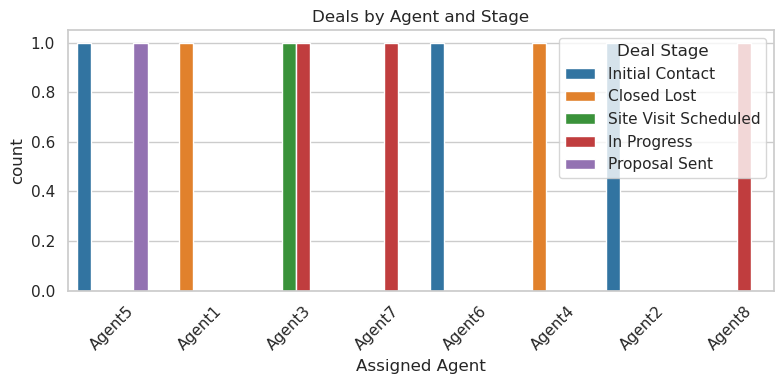

In [41]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Assigned Agent", hue="Deal Stage", palette="tab10")
plt.title("Deals by Agent and Stage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("agent_deal_stages.png")
plt.show()

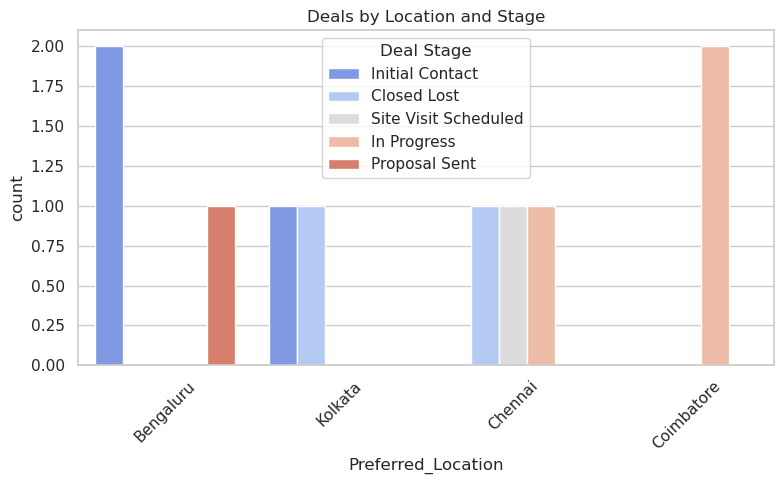

In [42]:
df_exploded = df.copy()
df_exploded["Preferred_Location"] = df_exploded["Preferred Locations"].str.split(",").explode().str.strip()

plt.figure(figsize=(8, 5))
sns.countplot(data=df_exploded, x="Preferred_Location", hue="Deal Stage", palette="coolwarm")
plt.title("Deals by Location and Stage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("location_conversion.png")
plt.show()